# Face and Eye detection with OpenCV Cascade Classifier

**References**
- [Machine Learning Mastery - How to perform Face Detection](https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/)
- [Open CV Docs - Face Detection](https://docs.opencv.org/3.4.3/d7/d8b/tutorial_py_face_detection.html)
- [Open CV Docs - Cascade Classifier](https://docs.opencv.org/4.5.2/db/d28/tutorial_cascade_classifier.html)

## Imports

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
cv2.__version__

'4.5.2'

## Creating the Cascade Classifiers
The XML specifications for the Cascade classifiers can be downloaded from [OpenCV Haar Cascades](https://github.com/opencv/opencv/tree/master/data/haarcascades).

In [3]:
face_classifier = cv2.CascadeClassifier(r'..\Data\Others\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'..\Data\Others\haarcascade_eye.xml')

## Sample Image 1

### Loading the image
The gray version of the image is used in Cascade classifier for eye detection.
The RGB version is used to display the image as CV2 loads the image in BGR format by default whereas Matplotlib uses RGB.

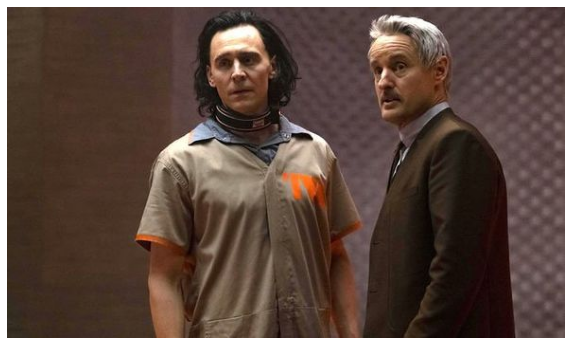

In [4]:
pixels = cv2.imread(r'..\Data\Images\loki.jpg')
pixel_gray = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
pixels_rgb = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 10))
plt.axis(False)
plt.grid(False)
plt.imshow(pixels_rgb);

### Detect faces and eyes

**Steps**
1. Use the `detectMultiScale` method of the face `CascadeClassifier` to get faces in the image.
    - The `detectMultiScale` methods accepts a pixel array and two optional parameters:
        - `scaleFactor` (Default value = 1.1): The factor by which to scale the image before detecting objects. Must be increased for images of lower size. Must be greater than 1.
        - `minNeighbors` (Default value = 3): The minimum number of candidate rectangles that must detect the image before it is accepted. Lower values lead to more objects being detected but with higher false positives and vice versa.
    - The `detectMultiScale` method returns an array for each bounding box which are represented by the coordinates of the top left corner points (x, y) and width and height of the boxes.
2. Draw a rectangle for the detected bounding box for each face.
3. For each face bounding box, use the `detectMultiScale` method of the eye `CascadeClassifier` to get eyes for that face.
4. Draw rectangles for each detected eye.
5. Convert the image from BGR format to RGB.
6. Display the final image.
7. Tune the parameters `scaleFactor` and `minNeighbors` of both classifiers to get optimum results.

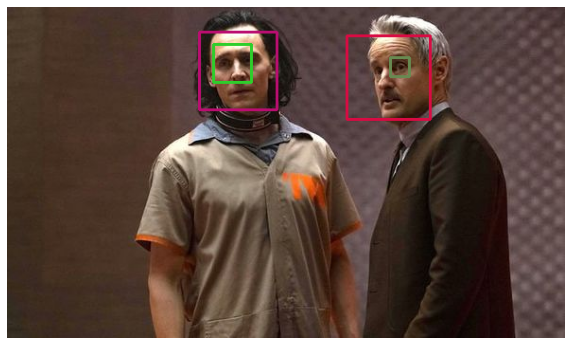

In [5]:
bboxes = face_classifier.detectMultiScale(pixels, scaleFactor = 1.1, minNeighbors = 4)

for box in bboxes:
	color = (np.random.randint(0, 128), np.random.randint(0, 128), np.random.randint(128, 256))
	x, y, width, height = box
	x2, y2 = x + width, y + height
	cv2.rectangle(pixels, (x, y), (x2, y2), color, 2)
	
	eyes = eye_cascade.detectMultiScale(pixel_gray[y : y2, x : x2], scaleFactor = 2, minNeighbors = 1)
	face = pixels[y : y2, x : x2]
	
	for eye in eyes:
		color = (np.random.randint(0, 128), np.random.randint(128, 256), np.random.randint(0, 128))
		x, y, width, height = eye
		x2, y2 = x + width, y + height
		cv2.rectangle(face, (x, y), (x2, y2), color, 2)
		
pixels_rgb = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 10))
plt.axis(False)
plt.grid(False)
plt.imshow(pixels_rgb);

## Sample Image 2

### Loading the image

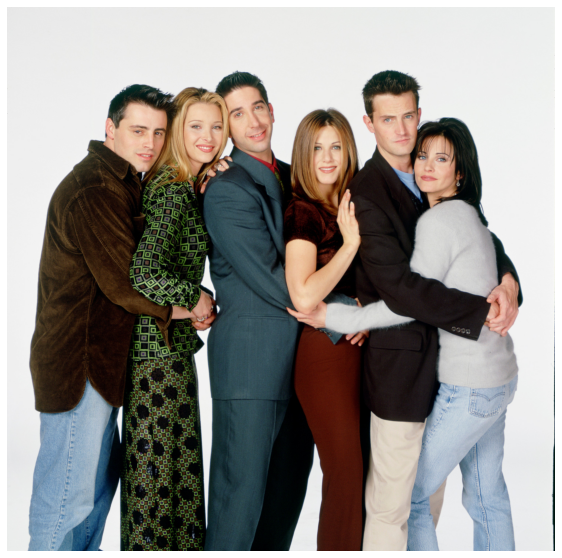

In [6]:
pixels = cv2.imread(r'..\Data\Images\friends.jpg')
pixel_gray = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
pixels_rgb = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 10))
plt.axis(False)
plt.grid(False)
plt.imshow(pixels_rgb);

### Detect faces and eyes

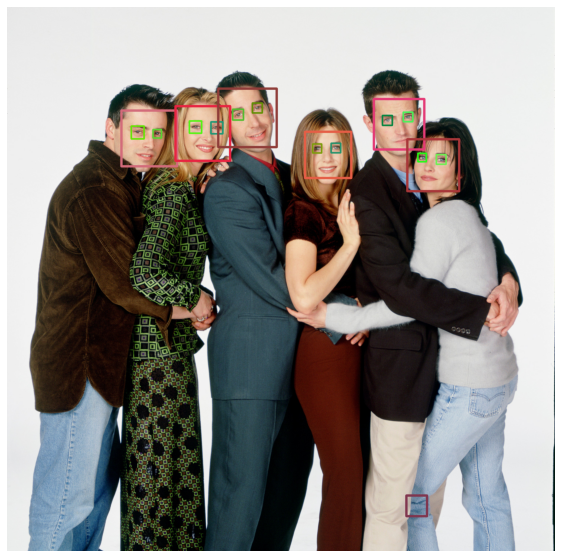

In [7]:
bboxes = face_classifier.detectMultiScale(pixels, scaleFactor = 1.25, minNeighbors = 10)

for box in bboxes:
	color = (np.random.randint(0, 128), np.random.randint(0, 128), np.random.randint(128, 256))
	x, y, width, height = box
	x2, y2 = x + width, y + height
	cv2.rectangle(pixels, (x, y), (x2, y2), color, 12)
	
	eyes = eye_cascade.detectMultiScale(pixel_gray[y : y2, x : x2], scaleFactor = 1.3, minNeighbors = 6)
	face = pixels[y : y2, x : x2]
	
	for eye in eyes:
		color = (np.random.randint(0, 128), np.random.randint(128, 256), np.random.randint(0, 128))
		x, y, width, height = eye
		x2, y2 = x + width, y + height
		cv2.rectangle(face, (x, y), (x2, y2), color, 7)
		
pixels_rgb = cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10, 10))
plt.axis(False)
plt.grid(False)
plt.imshow(pixels_rgb);